In [15]:
#Day 1

pip install pandas numpy matplotlib seaborn scikit-learn




SyntaxError: invalid syntax (3023562938.py, line 3)

In [2]:
# Load the dataset 
import pandas as pd
df = pd.read_csv('studentsPerformance.csv')

In [3]:
import pandas as pd
import os

try:
    df = pd.read_csv('studentsPerformance.csv')
    print("First 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print("File not found in current directory. Trying alternative methods...")

First 5 rows of the dataset:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [4]:
# Understand features and target labels

df['average'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df['pass'] = df['average'] >= 40


In [5]:
#Day 2

# Check current working directory
import os      
print("Current working directory:", os.getcwd())

Current working directory: d:\Intern\Project 1


In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('studentsPerformance.csv')

# Display first few rows
print("First 5 rows:")
print(df.head())

# Basic Statistics mean, median, nulls
print("\nMean of numeric columns:")
print(df.mean(numeric_only=True))

print("\nMedian of numeric columns:")
print(df.median(numeric_only=True))

print("\nMissing values:")
print(df.isnull().sum())


First 5 rows:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Mean of numeric columns:
math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

Median of numeric columns:
math

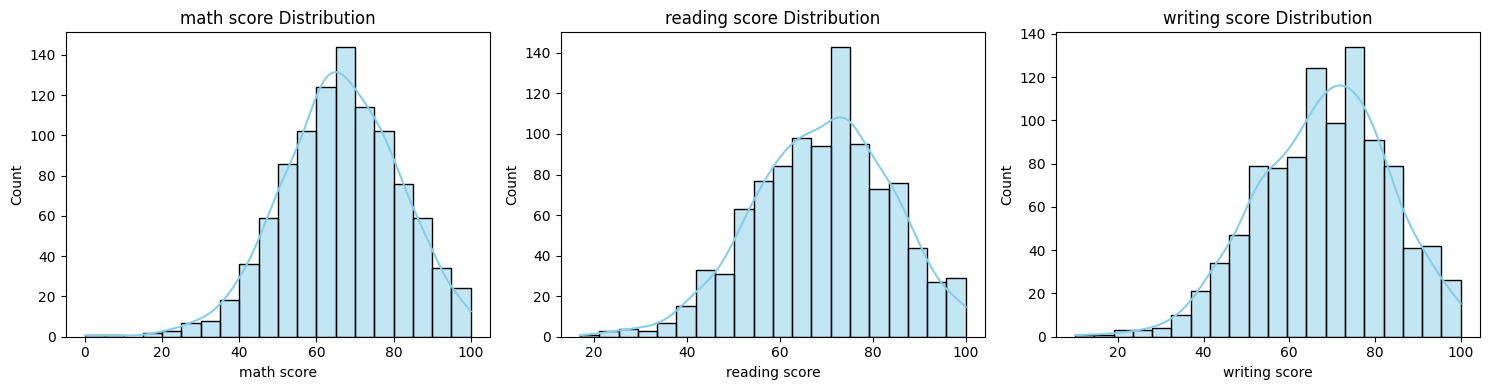

In [7]:
#  Plot histograms of scores

score_columns = ['math score', 'reading score', 'writing score']

plt.figure(figsize=(15, 4))
for i, col in enumerate(score_columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


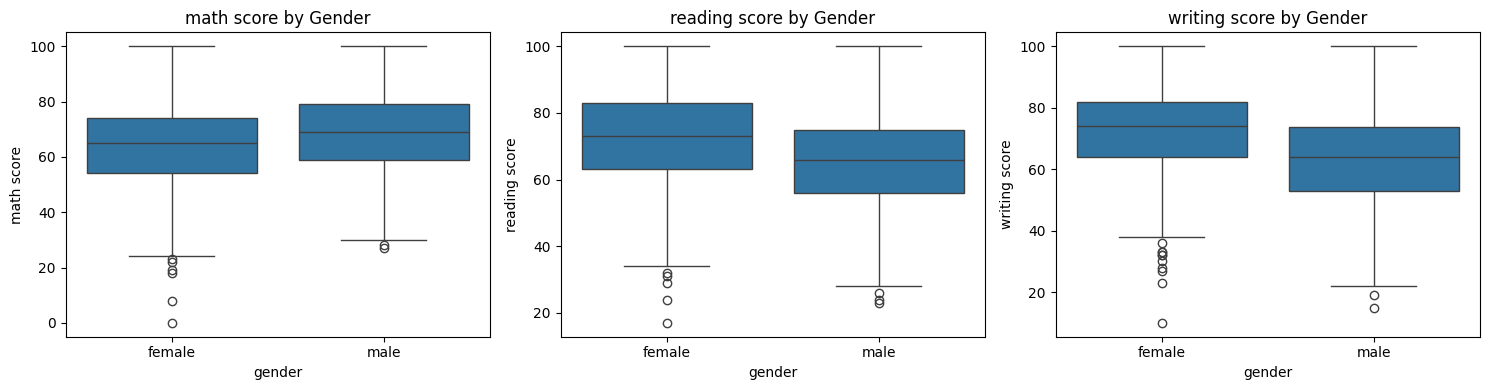

In [8]:
# Boxplots to compare gender-wise score distribution

score_columns = ['math score', 'reading score', 'writing score']
plt.figure(figsize=(15, 4))
for i, col in enumerate(score_columns):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, x='gender', y=col)
    plt.title(f'{col} by Gender')
plt.tight_layout()
plt.show()


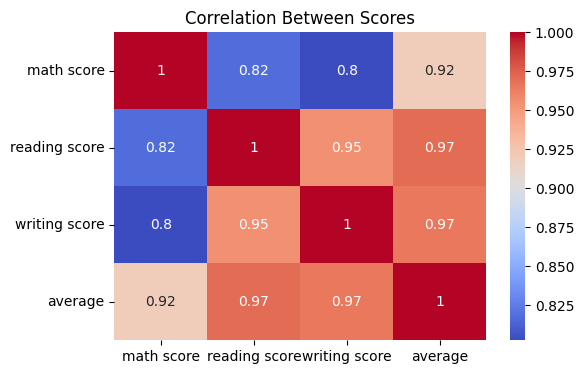

In [9]:
# Add average score column if not already present

score_columns = ['math score', 'reading score', 'writing score']
df['average'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass'] = (df['average'] >= 40).astype(int)
df['average'] = df[score_columns].mean(axis=1)

#  Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[score_columns + ['average']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Scores")
plt.show()


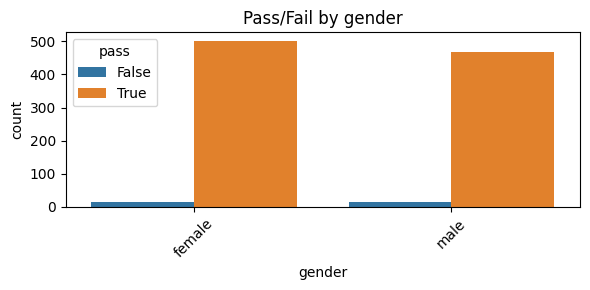

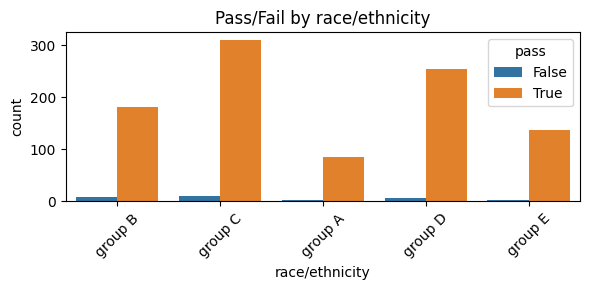

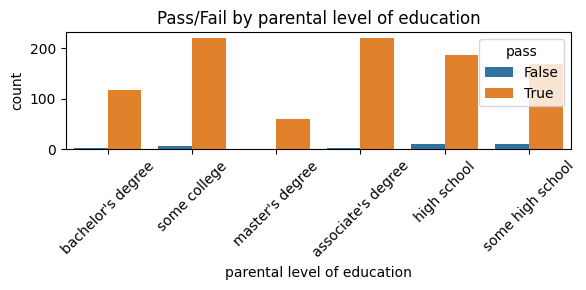

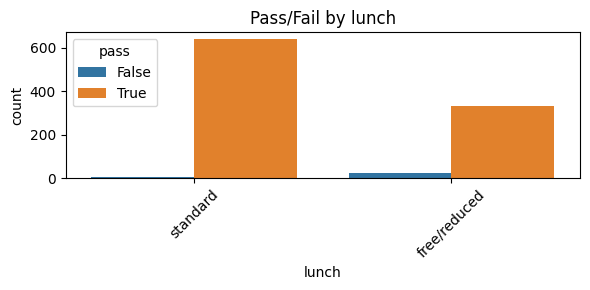

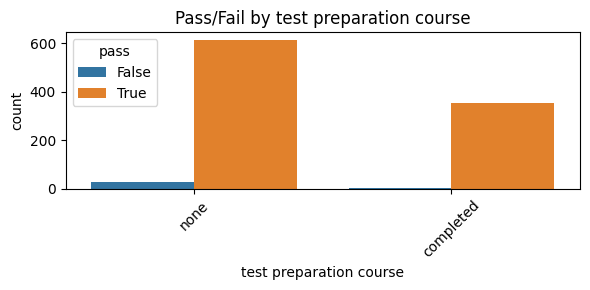

In [10]:
#  Create a binary target column for pass/fail

df['average'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass'] = (df['average'] >= 40).astype(int)
df['pass'] = df['average'] >= 40

#  Visualize impact of categorical features on pass/fail

cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, hue='pass')
    plt.title(f"Pass/Fail by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [11]:
  #Day 3

#  1. Import Required Libraries

import pandas as pd                                                   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#  2. Load Dataset

df = pd.read_csv('studentsPerformance.csv')

print("Initial Data Preview:")
print(df.head())

#  3. Create 'average' Score & 'pass' Label

df['average'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass'] = (df['average'] >= 40).astype(int)

# 4. Check for Missing Values

print("\nMissing Values Check:")
print(df.isnull().sum())

# 5. Encode Categorical Features

label_cols = ['gender', 'race/ethnicity', 'parental level of education',
              'lunch', 'test preparation course']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

print("\nEncoded Categorical Columns Preview:")
print(df[label_cols].head())

#  6. Select Features and Target

X = df[['gender', 'race/ethnicity', 'parental level of education',
        'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']]
y = df['pass']

#  7. Scale the Features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nScaled Feature Example (first 5 rows):")
print(X_scaled[:5])

# 8. Split into Training and Test Sets

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

print("\nData Shapes:")
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Initial Data Preview:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Missing Values Check:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch          

In [12]:
#day 4

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Train Logistic Regression Model                   day 4

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log)

print("Logistic Regression Accuracy:", round(log_accuracy * 100, 2), "%")


#Train Decision Tree Classifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

y_pred_tree = tree_clf.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

print("Decision Tree Accuracy:", round(tree_accuracy * 100, 2), "%")


#Compare Both Models

if log_accuracy > tree_accuracy:
    print(" Logistic Regression performs better.")
elif tree_accuracy > log_accuracy:
    print(" Decision Tree performs better.")
else:
    print(" Both models perform equally.")


Logistic Regression Accuracy: 98.0 %
Decision Tree Accuracy: 99.5 %
 Decision Tree performs better.


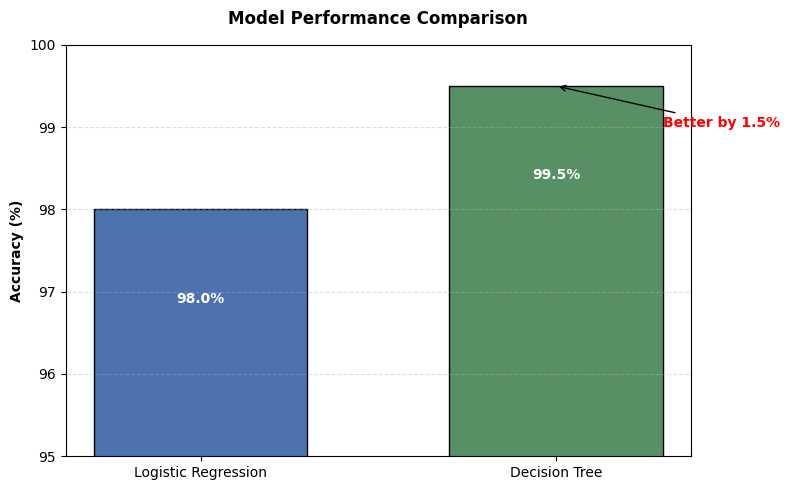

In [16]:
import matplotlib.pyplot as plt

# Data
models = ['Logistic Regression', 'Decision Tree']
accuracy = [98.0, 99.5]
colors = ['#4C72B0', "#589065"]  # Blue and green

# Create figure
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracy, color=colors, edgecolor='black', width=0.6)

# Add accuracy labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 1, 
             f'{height}%', ha='center', va='top', color='white', fontweight='bold')

# Highlight the better model
plt.annotate('Better by 1.5%', xy=(1, 99.5), xytext=(1.3, 99),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontweight='bold', color='red')

# Customize axes and title
plt.ylim(95, 100)
plt.ylabel('Accuracy (%)', fontweight='bold')
plt.title('Model Performance Comparison', fontweight='bold', pad=15)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.98      1.00      0.99       190

    accuracy                           0.98       200
   macro avg       0.99      0.80      0.87       200
weighted avg       0.98      0.98      0.98       200



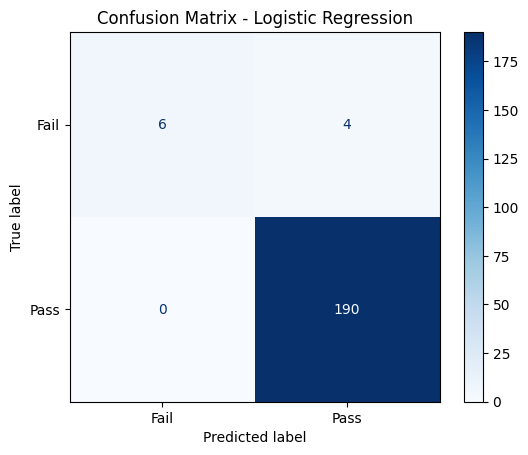

 Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.99      1.00      1.00       190

    accuracy                           0.99       200
   macro avg       1.00      0.95      0.97       200
weighted avg       1.00      0.99      0.99       200



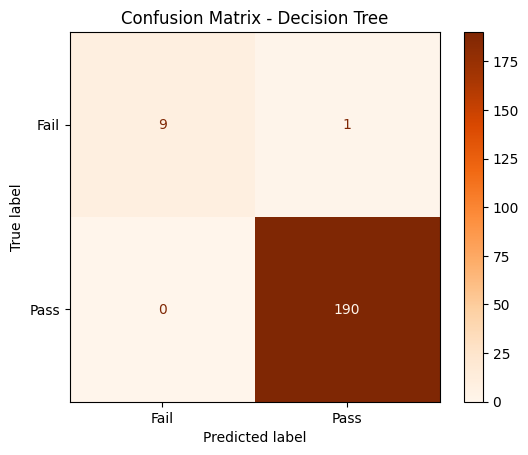

 Decision Tree selected as final model due to better performance on all key metrics.


In [14]:
 #day 5

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt                         

# Evaluate Logistic Regression

# Classification report
print(" Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["Fail", "Pass"])
disp_log.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


#Evaluate Decision Tree

# Classification report
print(" Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

# Confusion Matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=["Fail", "Pass"])
disp_tree.plot(cmap="Oranges")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


#Final Model Selection Summary:

if log_accuracy > tree_accuracy:
    print(" Logistic Regression selected as final model due to higher performance on all key metrics.")
else:
    print(" Decision Tree selected as final model due to better performance on all key metrics.")


In [15]:
# Day 6

"""
Project: Student Performance Prediction
Author: [Your Name]
Objective: Predict whether a student will pass or fail using ML models.

Process:
1. Load and explore the dataset
2. Perform EDA to understand features
3. Preprocess the data (cleaning, encoding, scaling)
4. Train and evaluate Logistic Regression & Decision Tree
5. Select the best model based on metrics

"""

# 1. Drop target column and separate features and labels
X = df.drop("pass", axis=1)
y = df["pass"]

# 2. Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# 3. Feature selection (optional: select top 10)
from sklearn.feature_selection import SelectKBest, f_classif
X_selected = SelectKBest(score_func=f_classif, k=10).fit_transform(X_encoded, y)

# 4. Train-test split
from sklearn.model_selection import train_test_split
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 5. Scale features
from sklearn.preprocessing import StandardScaler
scaler_sel = StandardScaler()
X_train_sel = scaler_sel.fit_transform(X_train_sel)
X_test_sel = scaler_sel.transform(X_test_sel)

# 6. Train Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_sel, y_train_sel)

# 7. Predict and print accuracy
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test_sel)
accuracy = accuracy_score(y_test_sel, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")





Model Accuracy: 98.0 %


C:\Users\yasht\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=9. All the features will be returned.
  warnings.warn(
